In [7]:
import torch
import torchvision
import torchvision.transforms as transforms


from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,),(0.5,))])

In [9]:
training_set = torchvision.datasets.FashionMNIST(
            './data', train=True, transform=transform, download=True)

validation_set = torchvision.datasets.FashionMNIST(
            './data', train=True, transform=transform, download=True)


100%|██████████| 26421880/26421880 [00:33<00:00, 788889.73it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 192613.60it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:08<00:00, 506490.94it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8434483.20it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [10]:
training_loader = torch.utils.data.DataLoader(
                    training_set, batch_size=4, shuffle=True)
validation_loader = torch.utils.data.DataLoader(
                    validation_set, batch_size=4, shuffle=True)

In [11]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

Trouser  Shirt  T-shirt/top  Sneaker


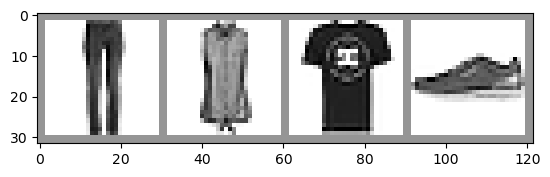

In [12]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))